In [17]:
import pandas as pd
import os
import torch
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
from transformers import Wav2Vec2FeatureExtractor
from transformers import Wav2Vec2Processor, Wav2Vec2CTCTokenizer
import soundfile as sf


MAXSTEP = 3032
MODELNAMES = [
    "18_normalised",
    "19_unnormalised",
    ]
VOCABS = {
"18_normalised": "vocab_300.json",
"19_unnormalised": "vocab_300_with_numbers.json"
}
COLS = {
"18_normalised": "human_transcript",
"19_unnormalised": "unnormalized_transcript"
}
CHECKPOINTS = [
    "checkpoint-757",
    "checkpoint-1514",  
    "checkpoint-2271", 
    "checkpoint-3028", 
]
dev = pd.read_csv("17_dev.csv")
test = pd.read_csv("17_test.csv")

from datasets import load_metric
wer_metric = load_metric("wer")
cer_metric = load_metric("cer")

def get_transcript(setup: dict):
    tokenizer = Wav2Vec2CTCTokenizer.from_pretrained(
            "/home/peterr/macocu/task8/", unk_token="[UNK]", 
            pad_token="[PAD]", word_delimiter_token=" ")
    feature_extractor = Wav2Vec2FeatureExtractor(
        feature_size=1, sampling_rate=16000, padding_value=0.0, do_normalize=True, return_attention_mask=True)

    processor = Wav2Vec2Processor(
        feature_extractor=feature_extractor, tokenizer=tokenizer)
    model = Wav2Vec2ForCTC.from_pretrained(setup.get("checkpoint_path")).cuda()

    def transcribe(path):
        speech, sample_rate = sf.read(os.path.join("/home/peterr/macocu/task8/transfer_10/", path))
        input_values = processor(speech, sampling_rate=sample_rate, return_tensors="pt").input_values.cuda()

        logits = model(input_values).logits

        predicted_ids = torch.argmax(logits, dim=-1)
        transcription = processor.decode(predicted_ids[0]).lower()
        return transcription
    predictions = [transcribe(path) for path in setup.get("paths")]
    return predictions





results = list()
for modelname in MODELNAMES:
    vocabulary_file = VOCABS.get(modelname)
    print("Preparing the following vocabulary:", vocabulary_file)
    os.system(f"cp {vocabulary_file} vocab.json")
    for i, checkpoint in enumerate(CHECKPOINTS):
        steps = (i+1) * 757
        epochs = steps * 8 / MAXSTEP
        checkpoint_path = os.path.join(modelname, checkpoint)
        
        for df_name, df in zip(["dev", "test"], [dev, test]):
            col = COLS.get(modelname)
            references = df[col]
            paths = df["hashname"]
            SETUP =  dict(
                        modelname=modelname,
                        vocabulary_file=vocabulary_file,
                        checkpoint=checkpoint,
                        checkpoint_path=checkpoint_path,
                        df_name=df_name,
                        col=col,
                        steps=steps,
                        epochs=epochs,
                        paths=paths
                        )
            print({key: value for key, value in SETUP.items() if key != "paths"})
            predictions = get_transcript(SETUP)
            del SETUP["paths"]

            cer = cer_metric.compute(predictions=predictions, references=references)
            wer = wer_metric.compute(predictions=predictions, references=references)

            SETUP["wer"] = wer
            SETUP["cer"] = cer

            results.append(SETUP)




Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Preparing the following vocabulary: vocab_300.json
{'modelname': '18_normalised', 'vocabulary_file': 'vocab_300.json', 'checkpoint': 'checkpoint-757', 'checkpoint_path': '18_normalised/checkpoint-757', 'df_name': 'dev', 'col': 'human_transcript', 'steps': 757, 'epochs': 1.9973614775725594}


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'modelname': '18_normalised', 'vocabulary_file': 'vocab_300.json', 'checkpoint': 'checkpoint-757', 'checkpoint_path': '18_normalised/checkpoint-757', 'df_name': 'test', 'col': 'human_transcript', 'steps': 757, 'epochs': 1.9973614775725594}


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'modelname': '18_normalised', 'vocabulary_file': 'vocab_300.json', 'checkpoint': 'checkpoint-1514', 'checkpoint_path': '18_normalised/checkpoint-1514', 'df_name': 'dev', 'col': 'human_transcript', 'steps': 1514, 'epochs': 3.994722955145119}


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'modelname': '18_normalised', 'vocabulary_file': 'vocab_300.json', 'checkpoint': 'checkpoint-1514', 'checkpoint_path': '18_normalised/checkpoint-1514', 'df_name': 'test', 'col': 'human_transcript', 'steps': 1514, 'epochs': 3.994722955145119}


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'modelname': '18_normalised', 'vocabulary_file': 'vocab_300.json', 'checkpoint': 'checkpoint-2271', 'checkpoint_path': '18_normalised/checkpoint-2271', 'df_name': 'dev', 'col': 'human_transcript', 'steps': 2271, 'epochs': 5.992084432717678}


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'modelname': '18_normalised', 'vocabulary_file': 'vocab_300.json', 'checkpoint': 'checkpoint-2271', 'checkpoint_path': '18_normalised/checkpoint-2271', 'df_name': 'test', 'col': 'human_transcript', 'steps': 2271, 'epochs': 5.992084432717678}


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'modelname': '18_normalised', 'vocabulary_file': 'vocab_300.json', 'checkpoint': 'checkpoint-3028', 'checkpoint_path': '18_normalised/checkpoint-3028', 'df_name': 'dev', 'col': 'human_transcript', 'steps': 3028, 'epochs': 7.989445910290238}


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'modelname': '18_normalised', 'vocabulary_file': 'vocab_300.json', 'checkpoint': 'checkpoint-3028', 'checkpoint_path': '18_normalised/checkpoint-3028', 'df_name': 'test', 'col': 'human_transcript', 'steps': 3028, 'epochs': 7.989445910290238}


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Preparing the following vocabulary: vocab_300_with_numbers.json
{'modelname': '19_unnormalised', 'vocabulary_file': 'vocab_300_with_numbers.json', 'checkpoint': 'checkpoint-757', 'checkpoint_path': '19_unnormalised/checkpoint-757', 'df_name': 'dev', 'col': 'unnormalized_transcript', 'steps': 757, 'epochs': 1.9973614775725594}


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'modelname': '19_unnormalised', 'vocabulary_file': 'vocab_300_with_numbers.json', 'checkpoint': 'checkpoint-757', 'checkpoint_path': '19_unnormalised/checkpoint-757', 'df_name': 'test', 'col': 'unnormalized_transcript', 'steps': 757, 'epochs': 1.9973614775725594}


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'modelname': '19_unnormalised', 'vocabulary_file': 'vocab_300_with_numbers.json', 'checkpoint': 'checkpoint-1514', 'checkpoint_path': '19_unnormalised/checkpoint-1514', 'df_name': 'dev', 'col': 'unnormalized_transcript', 'steps': 1514, 'epochs': 3.994722955145119}


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'modelname': '19_unnormalised', 'vocabulary_file': 'vocab_300_with_numbers.json', 'checkpoint': 'checkpoint-1514', 'checkpoint_path': '19_unnormalised/checkpoint-1514', 'df_name': 'test', 'col': 'unnormalized_transcript', 'steps': 1514, 'epochs': 3.994722955145119}


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'modelname': '19_unnormalised', 'vocabulary_file': 'vocab_300_with_numbers.json', 'checkpoint': 'checkpoint-2271', 'checkpoint_path': '19_unnormalised/checkpoint-2271', 'df_name': 'dev', 'col': 'unnormalized_transcript', 'steps': 2271, 'epochs': 5.992084432717678}


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'modelname': '19_unnormalised', 'vocabulary_file': 'vocab_300_with_numbers.json', 'checkpoint': 'checkpoint-2271', 'checkpoint_path': '19_unnormalised/checkpoint-2271', 'df_name': 'test', 'col': 'unnormalized_transcript', 'steps': 2271, 'epochs': 5.992084432717678}


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'modelname': '19_unnormalised', 'vocabulary_file': 'vocab_300_with_numbers.json', 'checkpoint': 'checkpoint-3028', 'checkpoint_path': '19_unnormalised/checkpoint-3028', 'df_name': 'dev', 'col': 'unnormalized_transcript', 'steps': 3028, 'epochs': 7.989445910290238}


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'modelname': '19_unnormalised', 'vocabulary_file': 'vocab_300_with_numbers.json', 'checkpoint': 'checkpoint-3028', 'checkpoint_path': '19_unnormalised/checkpoint-3028', 'df_name': 'test', 'col': 'unnormalized_transcript', 'steps': 3028, 'epochs': 7.989445910290238}


In [22]:
df = pd.DataFrame(data=results)
df.head(2)

,modelname,vocabulary_file,checkpoint,checkpoint_path,df_name,col,steps,epochs,wer,cer
0,18_normalised,vocab_300.json,checkpoint-757,18_normalised/checkpoint-757,dev,human_transcript,757,1.997361,0.197634,0.055039
1,18_normalised,vocab_300.json,checkpoint-757,18_normalised/checkpoint-757,test,human_transcript,757,1.997361,0.196416,0.054619


In [23]:
df.columns

Index(['modelname', 'vocabulary_file', 'checkpoint', 'checkpoint_path',
       'df_name', 'col', 'steps', 'epochs', 'wer', 'cer'],
      dtype='object')

In [25]:
df = df.loc[:, [
            'modelname', 
            'df_name', 
            'steps', 
            'wer', 
            'cer',
            'checkpoint', 
            'checkpoint_path',
            'col', 
            'epochs', 
            'vocabulary_file',
                ]]
df.head(2)

,modelname,df_name,steps,wer,cer,checkpoint,checkpoint_path,col,epochs,vocabulary_file
0,18_normalised,dev,757,0.197634,0.055039,checkpoint-757,18_normalised/checkpoint-757,human_transcript,1.997361,vocab_300.json
1,18_normalised,test,757,0.196416,0.054619,checkpoint-757,18_normalised/checkpoint-757,human_transcript,1.997361,vocab_300.json


In [26]:
df = df.rename(columns={"df_name": "split"})

In [27]:
df.head(2)

,modelname,split,steps,wer,cer,checkpoint,checkpoint_path,col,epochs,vocabulary_file
0,18_normalised,dev,757,0.197634,0.055039,checkpoint-757,18_normalised/checkpoint-757,human_transcript,1.997361,vocab_300.json
1,18_normalised,test,757,0.196416,0.054619,checkpoint-757,18_normalised/checkpoint-757,human_transcript,1.997361,vocab_300.json


In [29]:
df.to_json("21_results.jsonl", orient="records", lines=True)
df.to_csv("21_results.csv", index=False)

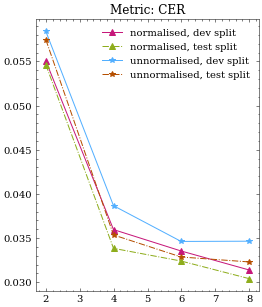

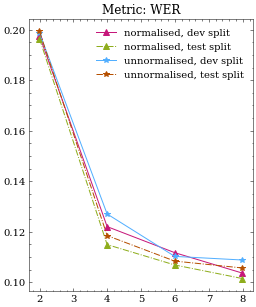

In [92]:
import matplotlib.pyplot as plt
plt.style.use("science,no-latex".split(","))
import numpy as np
import matplotlib as mpl
#plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Oranges(np.linspace(0.1,1,N//2)))
#plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20c.colors)
plt.rcParams['axes.prop_cycle'] = plt.cycler("color", ["#c6177a",
"#8ead1c",
"#52afff",
"#b54f00"])
for metric in ["cer", "wer"]:
    plt.figure(figsize=(4,5))  
    for modelname in df.modelname.unique():
        for split in df.split.unique():
            c1 = df.modelname == modelname
            c2 = df.split == split
            subset = df.loc[c1&c2, :]

            plt.plot(subset.epochs, subset[metric], f"{'-.' if split == 'test' else '-'}{'*' if '19' in modelname else '^'}", label = modelname[3:]+f", {split} split",)
    plt.title(f"Metric: {metric.upper()}")
    #plt.ylim((0, None))
    plt.legend()
    plt.savefig(f"images/21_{metric}.pdf")
    plt.savefig(f"images/21_{metric}.png", dpi=200)
    plt.show()
    

In [44]:
subset

,modelname,split,steps,wer,cer,checkpoint,checkpoint_path,col,epochs,vocabulary_file
9,19_unnormalised,test,757,0.199268,0.057449,checkpoint-757,19_unnormalised/checkpoint-757,unnormalized_transcript,1.997361,vocab_300_with_numbers.json
11,19_unnormalised,test,1514,0.118496,0.035354,checkpoint-1514,19_unnormalised/checkpoint-1514,unnormalized_transcript,3.994723,vocab_300_with_numbers.json
13,19_unnormalised,test,2271,0.108399,0.032860,checkpoint-2271,19_unnormalised/checkpoint-2271,unnormalized_transcript,5.992084,vocab_300_with_numbers.json
15,19_unnormalised,test,3028,0.105681,0.032303,checkpoint-3028,19_unnormalised/checkpoint-3028,unnormalized_transcript,7.989446,vocab_300_with_numbers.json


In [85]:
dev.columns

Index(['hashname', 'human_transcript', 'unnormalized_transcript',
       '18_normalised_output', '19_unnormalised_output'],
      dtype='object')

In [89]:
col = dev["unnormalized_transcript"]
dev.loc[col.str.contains("9"), ["unnormalized_transcript", "19_unnormalised_output"]]

,unnormalized_transcript,19_unnormalised_output
19,utvrditi da je zaklada tijekom te godine finan...,utvrditi da je zaklada tijekom te godine finan...
67,prema tome tako nešto je po zakonu o obveznim ...,prema tome tako nešto je po zazakonu o obvezni...
88,kolega panenić nigdje ne kaže da smo mi 93 stv...,kolega panenić nigdje ne kaže da smo mi 93 stv...
125,9313eez,93 13 ez
165,90 znači cijene a 10svih ostalih kriterija koj...,90 znači cijene a 10o svih ostalih kriterija k...
246,direktor uprave gospodin kovačev poslije njega...,direktor uprave gospodin kovačev poslije njega...
273,obrasce pa onda ne možete jednostavno to uspor...,obrasce pa onda ne možete jednostavno to uspor...
274,poštovani potpredsjedniče poštovani ministre z...,poštovani potpredsjedniče poštovani ministre j...
292,zakon ide u dva čitanja što je prilika za mogu...,zakon ide u dva čitanja što je oprilika za mog...
334,branitelja iz domovinskog rata izjednačavanje ...,branitelja iz domovinskog rata izjednačavanje ...


In [88]:
dev = pd.read_csv("17_dev.csv")
test = pd.read_csv("17_test.csv")